# Week 8 Wednesday

## Announcements

* Note cards available for Midterm 2 (Midterm 2 is Friday of Week 9).
* Sample midterm posted this weekend or earlier.
* There is a quiz next week (based on the worksheets due next week).
* Worksheet 16 is posted.
* I added course project instructions to the [course notes](https://christopherdavisuci.github.io/UCI-Math-10-S23/Proj/CourseProject.html).  We'll discuss the project on Friday.


## Simulated data for classification

Most of the code in this section is preliminary.  We first make an artificial dataset that we will use for classification, and then we write a helper function that will help us see the decision boundary of a classifier.  The `make_chart` function below is like an automated version of what we did at the end of the [Week 7 Wednesday](https://christopherdavisuci.github.io/UCI-Math-10-S23/Week7/Week7-Wednesday.html) class. 

In [4]:
import pandas as pd
import numpy as np
import altair as alt
from itertools import product

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Here we use a new scikit-learn function `make_blobs` to simulate some random data.  Don't worry about this function, the important thing is we now have some data on which we can perform classification.  We also divide it into a training set and a test set.

In [6]:
X,y = make_blobs(
            n_samples=5000, 
            n_features=2, 
            centers=[[0,0],[2,2]], 
            random_state=13, 
            cluster_std=0.8
        )

cols = ["x","y"]
df = pd.DataFrame(X, columns=cols)
df["Class"] = y

X_train, X_test, y_train, y_test = train_test_split(
                                        df[cols],
                                        df["Class"], 
                                        train_size=0.9,
                                        random_state=0
                                    )

Here is the data we generated using `make_blobs`.  Our goal is to classify points being in Class 0 or Class 1.  (The `grid=False` is just to remove the background grid.  I usually like the background grid, but below when we draw the decision boundaries, it can look a little strange.)

In [7]:
alt.Chart(df).mark_circle().encode(
    x="x",
    y="y",
    color="Class:N"
).properties(
    title="True values"
).configure_axis(
    grid=False
)

alt.Chart(...)

Here is a helper function that can plot predictions for us.  This is similar to our code from a few days ago for drawing decision boundaries.  We first make a DataFrame that will simulate many data points in the range from `-3` to `5` (for both the x-coordinate and the y-coordinate).

In [8]:
xx = np.linspace(-3,5,70)
df_art = pd.DataFrame(list(product(xx, repeat=2)), columns=["x", "y"])

Don't worry so much about this function; more important than being able to write this function yourself, would be to be able to interpret the results.  (This might be our first time specifying a default value for a function argument.  The following function can take either two or three arguments.  If we pass three arguments, the third will be assigned to `prob`.  If we pass two arguments, the default value of `False` will be used for `prob`.  This ability to specify default values will not come up often, if ever, in the rest of Math 10, so it is not something to focus on.)

Don't worry if the following code seems confusing.  The important thing is how we use it later on.

In [17]:
# clf should already be fit before calling this function
def make_chart(clf, df_art, prob=False):
    df_temp = df_art.copy()
    if prob:
        df_temp["pred"] = clf.predict_proba(df_temp)[:, 1]
        color_spec = alt.Color("pred:Q", scale=alt.Scale(scheme="blueorange"))
    else:
        df_temp["pred"] = clf.predict(df_temp)
        color_spec = alt.Color("pred:N")

    c = alt.Chart(df_temp).mark_circle().encode(
        x="x",
        y="y",
        color=color_spec,
        tooltip=["x", "y", "pred"]
    ).configure_axis(
        grid=False
    )
    
    return c

## Logistic regression

* Illustrate how the `make_chart` function works on a logistic regression classifier.
* Be sure to fit the classifier on the training data.

This scikit-learn routine should feel familiar.  We first import the class.

In [11]:
from sklearn.linear_model import LogisticRegression

Then we instantiate.

In [12]:
clf = LogisticRegression()

Then we fit.

In [13]:
clf.fit(X_train, y_train)

LogisticRegression()

This part is new.  We input the fit classifier along with our regular data (a grid of points stored in `df_art`).  The most important thing here is to notice that logistic regression has a linear decision boundary.  Note also that it is a diagonal decision boundary (unlike for decision trees, where the boundaries are always parallel to a coordinate axis).

In [18]:
make_chart(clf, df_art)

alt.Chart(...)

If we pass `prob=True` to the `make_chart` function, then the chart is colored in terms of the predicted probabilities.  (More precisely, these are the predicted probabilities of the point corresponding to Class 1.)  On the board, we looked at the equation for logistic regression, and noticed how any fixed probability (like probability `0.1`) corresponds to a straight line.

These Altair charts have a tooltip, so you can check the predicted probability of any given point by hovering your mouse over the point.

In [19]:
make_chart(clf, df_art, prob=True)

alt.Chart(...)

## Decision tree classifier

* Fit a decision tree classifier to the training data using a maximum of 5 leaf nodes.

Here we are back to the usual routine.  First we import.

In [20]:
from sklearn.tree import DecisionTreeClassifier

Then we instantiate.  Here we put a constraing on the Decision Tree, that it can have at most `5` leaf nodes.

In [21]:
clf = DecisionTreeClassifier(max_leaf_nodes=5)

Now we fit the classifier.

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

* How do the corresponding charts look?

The five leaf nodes correspond to four cuts.  Can you recognize the four cuts in the following?  Also notice that the decision boundaries are parallel to the x and y-axes.

In [23]:
make_chart(clf, df_art)

alt.Chart(...)

Because there are 5 leaf nodes, there are at most 5 predicted probabilities.  Notice how there are 5 different colored regions in the following.  (The top right is very likely to be Class 1, according to our classifier.  The bottom left is very unlikely.  The other regions are in the middle.)

In [25]:
make_chart(clf, df_art, prob=True)

alt.Chart(...)

* How does the corresponding decision tree diagram compare?

Reminder (don't memorize this):
```
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=["0", "1"], # I named the classes
                   filled=True)
```

Can you get from the following diagram to the above chart?  For example, you would start by drawing a vertical line at $x = 1.016$, corresponding to the original branch.  Then (only) on the left side of that line, we would draw a horizontal line corresponding to $y = 1.688$, and on the right side of that line, we would draw a horizontal line corresponding to $y = 0.453$, and so on.

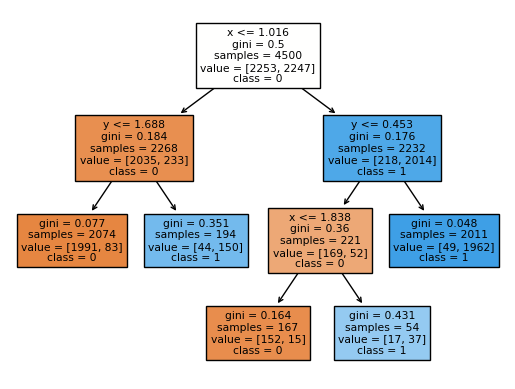

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=["0", "1"], # I named the classes
                   filled=True)

If you hover your mouse over part of the Altair chart where x is less than 1.016 and where y is less than 1.688, you should see a prediction of `0.04`.  We can compute that same number directly from the tree diagram as follows.

In [26]:
83/(1991+83)

0.04001928640308582

* Do the same thing for 300 leaf nodes.

You should worry that a decision tree with 300 leaf nodes is likely to overfit the data, at least for our simple data.  (I would be less worried about this for something like handwritten digit data, where each input point is 784-dimensional, as opposed to this data, where each input point is 2-dimensional.)

In [27]:
clf = DecisionTreeClassifier(max_leaf_nodes=300)

We fit the data (always to the training dataset, although it turned out today we never used the test set).

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=300)

I would say this chart does not look terrible, but it probably suggests overfitting.

In [29]:
make_chart(clf, df_art)

alt.Chart(...)

* Why does the probability chart with 300 leaf nodes suggest overfitting?

The chart with the probabilities, on the other hand, screams overfitting, even though the shape is exactly the same.  Why?  Check out the listed probabilities.  Everything is probability 0 or probability 1.  This is because our model, when dividing the data, has enough flexibility to shrink each region down until it only contains points of Class 0 or points of Class 1, and so the probabilities in turn are always 0 or 1.  It's not reasonable to assume that one of the random middle blue points here has a probability 0 of being Class 1, while every surrounding point has a probability 1 of being Class 1.

In [30]:
make_chart(clf, df_art, prob=True)

alt.Chart(...)

## Random forest classifier

"Small" decision trees (with a very limited depth or a very limited number of leaf nodes) can be too rigid.  "Big" decision trees can be prone to overfitting.  A *Random Forest* is a type of Machine Learning model built from many decision trees, and it can help protect against both of these deficiencies.

Basically a random forest fits many decision trees to the data, and then an average of the predictions from those trees.  Of course, we don't want to use the same tree many times, so randomness is included in this process in two different ways.

* First: the entire training set is not used for any given tree, because samples are chosen from the training set *with replacement*.
* Second: typically at any given split, only a limited number of the features are allowed to be split on.  (This second source of randomness is not as beneficial in a case like this current dataset, which has only two features.  But for a dataset for example classifying house prices, you probably don't want every tree to begin with "size" or whatever the most relevant feature is.  In the Titanic dataset, you probably don't want every tree to begin with "gender".)

* Fit a random forest classifier to the data using 200 decision trees, each with a maximum of 5 leaf nodes.

We are back to our usual routine.  This classifier is defined in the `ensemble` library, presumably because a random forest involves a collection of decision trees.  (The name "forest" makes it easy to remember.)

In [31]:
from sklearn.ensemble import RandomForestClassifier

Here we use the same number of leaf nodes as earlier, and we also specify `n_estimators=200`, which means our random forest will contain 200 decision trees.

In [32]:
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=5)

Now we fit the classifier to the training data.

In [33]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=5, n_estimators=200)

Notice how much better this looks (how much more flexible, while still being fairly regular), than the corresponding chart for a decision tree with 5 leaf nodes.  It turns out that random forests can both fight against underfitting (as in this example) and also fight against overfitting (as in the next example with 300 leaf nodes).

In [34]:
make_chart(rfc, df_art)

alt.Chart(...)

Here are the corresponding probabilities.  Because we are taking averages from many decision trees, even though each individual decision tree only has 5 possible predicted probabilities, the probabilities for different trees will be different in general, and so when we take averages, we have many more than 5 outputs.  (Just run your mouse over the following chart, and notice how many more than 5 probabilities are output.)

In [35]:
make_chart(rfc, df_art, prob=True)

alt.Chart(...)

* Do the same thing for 300 leaf nodes.

In [36]:
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=300)

In [37]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=300, n_estimators=200)

This chart I would say looks a little better than the corresponding decision tree chart, but it still suggests some overfitting.

In [38]:
make_chart(rfc, df_art)

alt.Chart(...)

But at least the corresponding probability chart looks much better than the corresponding decision tree chart.  Recall that in our decision tree chart with 300 leaf nodes, every predicted probability was either 0 or 1.  Here the random forest has much more nuance in its predictions.

In [39]:
make_chart(rfc, df_art, prob=True)

alt.Chart(...)

* How can we find the individual trees within the random forest?

Recall that our random forest was built out of 200 decision trees (because of our `n_estimators=200` input to the constructor).  We can actually access a list of those decision trees through the `estimators_` attribute.

In [40]:
type(rfc.estimators_)

list

The length is exactly the number of trees in our forest.

In [41]:
len(rfc.estimators_)

200

Here we check that one particular entry in the list is indeed a Decision Tree Cassifier.

In [42]:
type(rfc.estimators_[40])

sklearn.tree._classes.DecisionTreeClassifier

There is a technicality that the decision trees in the list do not store the feature names (the column names "x" and "y" in our case) which is why the following warning comes up, but just notice how we are getting a chart corresponding to one of the 200 decision trees in our random forest.

In [45]:
make_chart(rfc.estimators_[39], df_art)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


alt.Chart(...)

Look back and forth at these two decision tree charts, and convince yourself that they are fairly different.  Our overall random forest predictions are formed by taking an average of these predictions.

In [44]:
make_chart(rfc.estimators_[40], df_art)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


alt.Chart(...)

* How does the random forest compute its predicted probabilities from the decision trees?  Return to a smaller number of leaf nodes and check for the input point (1,1).

In [46]:
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=20)

In [49]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=200)

In a recent class, we saw two ways using dictionaries to make a small DataFrame.  Here is another approach that uses a list of lists, instead of a dictionary.

In [47]:
df_fake = pd.DataFrame([[1,1]], columns=["x", "y"])

Our random forest classifier believes there is a probability of 0.362 that a point at (1,1) corresponds to Class 1.  (I chose (1,1) because it is near the decision boundary.  I didn't want something that would output an extremly low or high probability.)

In [50]:
rfc.predict_proba(df_fake)

array([[0.63796008, 0.36203992]])

Notice that `predict_proba` outputs a two-dimensional array.  We can access the probability we're interested in by using indexing.  (I see now in retrospect that we could have also done `[0,1]`, which is more elegant.  That works with this NumPy array, but it would not work with a list of lists.)

In [51]:
rfc.predict_proba(df_fake)[0][1]

0.36203991811361236

Here we put the same predicted probability at input (1,1) into a list, for all 200 trees in our random forest, and then we convert that list into a NumPy array `arr`.

In [54]:
arr = np.array([tree.predict_proba([[1,1]])[0][1] for tree in rfc.estimators_])
arr

array([0.22857143, 0.33802817, 0.34173669, 0.08064516, 0.63492063,
       0.18359375, 0.08069164, 0.7       , 0.11372549, 0.42553191,
       0.91666667, 0.14130435, 0.2962963 , 0.27777778, 0.06802721,
       0.1       , 0.10989011, 0.75675676, 0.05785124, 0.13559322,
       0.56097561, 0.        , 0.48101266, 0.27272727, 0.28      ,
       0.36363636, 0.63414634, 0.99152542, 0.05785124, 0.32786885,
       0.53703704, 0.55294118, 0.55555556, 0.11627907, 0.95530726,
       0.64285714, 0.19548872, 0.125     , 0.45454545, 0.80918728,
       0.56985294, 0.08      , 0.29850746, 0.85232068, 0.13611111,
       0.50549451, 0.15384615, 0.90769231, 0.21333333, 0.22222222,
       0.65      , 0.35555556, 0.27272727, 0.8       , 0.37837838,
       0.28787879, 0.14814815, 0.48888889, 0.28787879, 0.08474576,
       0.        , 0.49019608, 0.18181818, 0.28888889, 0.05714286,
       0.15702479, 0.78571429, 0.17786561, 0.10572687, 0.98870968,
       0.10059172, 0.63793103, 0.11764706, 0.        , 0.51724

I wanted these numbers to be in a NumPy array, rather than in a Python list, so I could call the `mean` method to compute their average.  Notice that it's the exact same number as was returned by our random forest classifier.

In [55]:
arr.mean()

0.36203991811361225